In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import pickle
import re
# import tensorflow as tf # for version compactibility issues 

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow.python.platform
from tensorflow.python.platform import gfile
from skimage.io import imread
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.model_selection import  cross_val_score
# The two discriminant methods below support multiclass
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
def create_graph():
    with gfile.FastGFile('inception-2015-12-05/classify_image_graph_def.pb', 'rb') as f: #modify the path of the pb file here
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
    
def extract_features_moving_window(image_data): #image_data is np array
    create_graph() #necessary for getting tensors

    with tf.Session() as sess:
        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')

        predictions = sess.run(next_to_last_tensor, {'DecodeJpeg:0': image_data})
        return np.squeeze(predictions).reshape(1,-1)

def moving_windows(image,lda): #very big complexity, it's more efficient to run on server!!
    result = {}
    h,w,_ = image.shape
    index=1
    for x in range(0,h-64,64):
        for y in range(0,w-64,64):
            print(index," th moving window")
            index=index+1
            block = image[x:x+65,y:y+65,:]
            feature = extract_features_moving_window(block)
            if feature is None:
                continue
            else:
                res = lda.predict_proba(feature)[0,0]
                if res > 0.9:
                    result[(x,y)]=1    
    return result

def drawVirtrualBox2(image, res):
    for k,v in res.items():
        if v==0:
            continue
        x,y = k
        maxy, maxx, minx, miny = y + 64, x + 128, x, y
        for k1 in res.keys():
            x1,y1 = k1
            if minx<=x1<=maxx and miny<=y1<=maxy or miny<=y1+64<=maxy:
                res[k1]=0
                maxy = max(maxy, y1+64)
                maxx = max(maxx, x1+128)
                miny = min(miny, y1)
                minx = min(minx, x1)
        cv2.rectangle(image, (miny,minx), (maxy,maxx), (255, 1, 2), 2)
    cv2.imshow("result", image)
    #cv2.waitKey()


In [4]:
extracted_features = pd.read_pickle("inception_cnn_features_Qingjie_Johnathan.pkl") #put here the path of pkl I've uploaded on github
X=extracted_features.values
labels=[]
for i in range(48):
    labels.append(1 if extracted_features.index[i][-1]=='+' else 0)
labels=np.array(labels)

In [5]:
#Scale data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42,stratify=labels)


In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

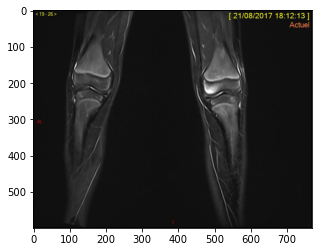

In [7]:
test_image_array=imread("../legs_folder_jpg_cnn_Qingjie/7TK_OCMR+.jpg") #put here the path of one positive image
plt.imshow(test_image_array)

In [8]:
t0 = time()
res=moving_windows(test_image_array,lda)
drawVirtrualBox2(test_image_array, res)
print("done in %0.3fs" % (time() - t0))

1  th moving window
Instructions for updating:
Use tf.gfile.GFile.
2  th moving window
3  th moving window
4  th moving window
5  th moving window
6  th moving window
7  th moving window
8  th moving window
9  th moving window
10  th moving window
11  th moving window
12  th moving window
13  th moving window
14  th moving window
15  th moving window
16  th moving window
17  th moving window
18  th moving window
19  th moving window
20  th moving window
21  th moving window
22  th moving window
23  th moving window
24  th moving window
25  th moving window
26  th moving window
27  th moving window
28  th moving window
29  th moving window
30  th moving window
31  th moving window
32  th moving window
33  th moving window
34  th moving window
35  th moving window
36  th moving window
37  th moving window
38  th moving window
39  th moving window
40  th moving window
41  th moving window
42  th moving window
43  th moving window
44  th moving window
45  th moving window
46  th moving win